In [1]:
%load_ext autoreload
%autoreload 1
%aimport ImageClassifier
%matplotlib inline

ImageClassifier Loaded!!!


In [2]:
#%%
from ImageClassifier import ImageClassifier as IC
from ImageClassifier import ModelTrainer as MT
import numpy as np
import matplotlib.pyplot as plt

import os

def get_string_for_array(ar):
    varstr = '['
    for i in ar: varstr+=(i.__name__ + "-") 

    if (varstr.endswith('-')): varstr = varstr[0:-1]    
    varstr += ']'
    return varstr
    

def printTestParam(EPOCHS, BATCH_SIZE, rate, pre_ops, save_dir='.'):
    print("------------------------------------------")
    print(" EPOCHS          : " + str(EPOCHS))
    print(" BATCH_SIZE      : " + str(BATCH_SIZE))
    print(" Pre-process Ops : " + get_string_for_array(pre_ops))
    print(" Save Dir        : " + save_dir)
    print("")    

def runTest(D=IC(), EPOCHS=10, BATCH_SIZE=128, rate=0.001, pre_ops=[],network=MT.LeNet, network_args={}):
    STR="EP-{}_BS-{}_R-{}_OPS-{}-NET-{}".format(EPOCHS, BATCH_SIZE, rate, get_string_for_array(pre_ops), network.__name__)
    STR=(os.path.join('test_results',STR))
    printTestParam(EPOCHS, BATCH_SIZE, rate, pre_ops, save_dir=STR)
    
    D.reset_data()
    D.preprocess_all(pre_ops)
    T = MT(D, EPOCHS=EPOCHS, BATCH_SIZE=BATCH_SIZE, rate=rate, network=network, network_args=network_args)
    T.train(dirname=STR, pre_ops=pre_ops)
    return D, T

---------------------------------
      | Train  | Test   | Valid  |
---------------------------------
 (#)  |  34799 |  12630 |   4410 |
 (%)  |   1.00 |   0.36 |   0.13 |
---------------------------------
Number Classes  : 43
Image Dimensions: (32, 32, 3)



In [3]:
#%%
from matplotlib.colors import hsv_to_rgb
import cv2

def get_rand(rng, num):
    return np.random.randint(low=rng.start, high=rng.stop, size=num)

def plot_grid_subplot(nrows, ncols, plot_func, func_args={}, col_labels=[]):
    fig,axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(20, min(100000, 20*(nrows / ncols))))
    for c in range(ncols):

        if (c < len(col_labels)): axs[0][c].set_title('{}'.format(col_labels[c]))
        for r in range(nrows):
            plot_func(r, c, fig, axs, **func_args)
    plt.show()  


def boost_hsv(img):
    h = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)/255.0
    #hsv_mean = [np.copy(h) -127.0 for h in hsv]
#    for i in range(3): h[:,:,i] /= (np.max(h[:,:,i]))
#    h[:,:,0] /= (np.mean(h[:,:,0]) + np.std(h[:,:,0]))
#    h[:,:,1] /= (np.mean(h[:,:,1]) + np.std(h[:,:,1]))
#    h[:,:,2] /= (np.mean(h[:,:,2]) + np.std(h[:,:,2]))
#    h = h.astype(np.float32)
#    h[:,:,0] /= (np.max(h[:,:,0]))
#    h[:,:,1] /= (np.max(h[:,:,1]))
    h[:,:,2] /= (np.max(h[:,:,2]))
#    h*=255.0
#    return cv2.cvtColor(h.astype(np.uint8), cv2.COLOR_HSV2RGB)
    return hsv_to_rgb(np.clip(h, 0.0, 1.0))


def boost_eq(img):
    h = np.copy(img)
    h = cv2.cvtColor(h, cv2.COLOR_RGB2YCrCb)
    h[:,:,0] = (cv2.equalizeHist(h[:,:,0]))
#    h[:,:,1] = (cv2.equalizeHist(h[:,:,1]))
#    h[:,:,2] = (cv2.equalizeHist(h[:,:,2]))
    
    return cv2.cvtColor(h, cv2.COLOR_YCrCb2RGB)


def boost_eq_gray(img):
    h = np.copy(img)
    h = cv2.cvtColor(h, cv2.COLOR_RGB2GRAY)

    h = (cv2.equalizeHist(h))
#    h[:,:,1] = (cv2.equalizeHist(h[:,:,1]))
#    h[:,:,2] = (cv2.equalizeHist(h[:,:,2]))
    
    return h
    

def boost_eq_gray_zmean_uvar(img):
    h = np.copy(img)
    h = cv2.cvtColor(h, cv2.COLOR_RGB2GRAY)
    h = h.astype(np.float32)
    
    h /= h.mean()
    h /= h.std()
    
    return h



def plot_data(data, classes=[], n_per_class=0, signs=None):
    n_classes = len(classes)        
    im_grid = {}
    for j, k in enumerate(classes):
        images = data[k]
        im_idx = np.random.randint(low=0, high=len(images), size=n_per_class)
        pstr = "Class: {:2d} | ".format(k)
        for i in im_idx: pstr+=" {:5d}".format(i)
        print(pstr)
        im_grid[j] = [images[im_idx[i]] for i in range(n_per_class)]         

    
    func = lambda r, c, fig, axs, ims: [axs[r][c].imshow(ims[c][r]), axs[r][c].axis('off')]
    plot_grid_subplot(n_per_class, n_classes, func, {'ims': im_grid})       
    

def show_image(r, c, fig, axs, ims):
    cmap, norm = None, None
    if (len(ims[c][r].shape) == 2): 
        cmap='gray'
#        norm = Normalize()
        
    axs[r][c].imshow(ims[c][r], cmap=cmap, norm=norm) 
    axs[r][c].axis('off')


def plot_data_2(data, classes=[], n_per_class=0, signs=None):
    n_classes = len(classes)        
    n_per_class
    im_grid = {}
    for j, k in enumerate(classes):
        images = data[k]
        im_idx = np.random.randint(low=0, high=len(images), size=n_per_class)
        print("Class: {} | {}".format(j, im_idx))
#        im_grid[j] = [np.hstack((images[im_idx[i]], boost_hsv(images[im_idx[i]]))) for i in range(n_per_class)] 
        im_grid[j] = [] 
        for i in range(n_per_class): 
            im_grid[j].append(np.copy(images[im_idx[i]]))
            im_grid[j].append(boost_hsv(images[im_idx[i]]))
            im_grid[j].append(boost_eq(images[im_idx[i]]))
            im_grid[j].append(cv2.cvtColor(images[im_idx[i]], cv2.COLOR_RGB2GRAY))
            im_grid[j].append(boost_eq_gray(images[im_idx[i]]))

    
    plot_grid_subplot(len(im_grid[0]), n_classes, show_image, {'ims': im_grid})       


def translate(t=[0,0]): return np.float32([[1, 0, t[0]], [0, 1, t[1]]])

def rotate(center, angle): return cv2.getRotationMatrix2D(center, angle, 1)
    
def warpImage(im_src, mat):
    sz = im_src.shape
    im_dst = np.zeros_like(im_src)
    
#    src = np.float32([ [5,5],  [5, 25], [25, 5]])
#    dst = (np.random.rand(3,2) * 32).astype(np.float32)
#    dst = np.float32([[13,3], [10, 25], [25, 5]])
#    mat = cv2.getAffineTransform(src, dst)
    for i in range(3):
        if (mat.shape == (3,3)): 
            im_dst[:, :, i] = cv2.warpPerspective(im_src[:,:,i], mat, (sz[0], sz[1]), borderMode=cv2.BORDER_REPLICATE)
        else:
            im_dst[:, :, i] = cv2.warpAffine(im_src[:,:,i], mat, (sz[0], sz[1]), borderMode=cv2.BORDER_REPLICATE)
    return im_dst


def augmentDataSet(dataset):
    M = []
    M.append(translate(t=[5, -5]))
    M.append(translate(t=[5,  5]))
    M.append(translate(t=[-5, 5]))
    M.append(translate(t=[-5,-5]))
    M.append(translate(t=[-5, 0]))
    M.append(translate(t=[ 5, 0]))
    M.append(translate(t=[ 0,-5]))
    M.append(translate(t=[ 0, 5]))
    for i in [-30, -20, -10, 10, 20, 30]: M.append(rotate((16,16), i))
    
    hist = [len(dataset[i]) for i in dataset]    
    for v in (dataset):
        m_max = max(hist)
        ims = dataset[v]
        n = len(ims)
        delta = m_max - n
        
        im_idx = np.random.randint(0, high = n, size = (delta))
        mt_idx = np.random.randint(0, high = len(M), size = (delta))    
        
        for i, idx in enumerate(im_idx):
            img = ims[idx]
            mat = M[mt_idx[i]]
            ims.append(warpImage(img, mat))
    
    
def augmentPerspective(img, sz=22, delta=3, t_rng=range(-10, 10)):
    rand = lambda rng, size=None: np.random.randint(rng.start, rng.stop, size=size)
    pt2Rng  = lambda pt, d=5: [range(i-d, i+d) for i in pt]
    getRect = lambda c=16, sz=22: [[c - sz/2, c - sz/2], 
                                   [c + sz/2, c - sz/2],
                                   [c + sz/2, c + sz/2],
                                   [c - sz/2, c + sz/2]] 
    

    pts = np.int32(getRect(sz=22))
    dst = [[rand(pt2Rng(pt, d=delta)[0]), rand(pt2Rng(pt, d=delta)[1])] for pt in pts]
    pts, dst = np.float32(pts), np.float32(dst) + np.float32([rand(t_rng), rand(t_rng)])   
    mat = cv2.getPerspectiveTransform(pts, dst)

    dst = np.zeros_like(img)        
    if (len(img.shape) == 2): 
        return cv2.warpPerspective(img, mat, (img.shape[0], img.shape[1]), borderMode=cv2.BORDER_REPLICATE)    
    
    if (len(img.shape) == 3):     
        for i in range(img.shape[2]):
            dst[:, :, i] = cv2.warpPerspective(img[:,:,i], mat, (img.shape[0], img.shape[1]), borderMode=cv2.BORDER_CONSTANT)
        return dst    

    return img


def augmentDatasetPerspective(dataset, num_total=2100):
    
    for v in (dataset):
        ims = dataset[v]
        n = len(ims)
        delta = num_total - n
        if (delta < 0): continue

        for idx in np.random.randint(low=0, high=n, size=delta):
            ims.append(augmentPerspective(ims[idx], sz=24, delta=3, t_rng=range(-7,7)))

class DataModifier:
    
    def __init__(self, data):
        self.signs = data.signs
        self.num_classes = data.num_classes
        self.train = DataModifier.split_data_into_classes(data.train['features'], data.train['labels'], self.num_classes)
        self.valid = DataModifier.split_data_into_classes(data.valid['features'], data.valid['labels'], self.num_classes)
        self.test  = DataModifier.split_data_into_classes(data.test ['features'], data.test ['labels'], self.num_classes)
        self.dmap  = { 'train': self.train, 'test': self.test, 'valid': self.valid }
    
    def split_data_into_classes(images, labels, num_classes):
        l_data = {i:[] for i in range(num_classes)}
        for idx, label in enumerate(labels): l_data[label].append(images[idx])
        return l_data    
    

    def print_data_stats(l_data, data_info, signs):
        print("-----------------------------------------------------------------------|")
        print("| Data : {:62.62}|".format(data_info))
        print("|                                                                      |")
        print("| Class |  Num Imgs  | Label                                           |")
        print("|----------------------------------------------------------------------|")
        for key, imgs in l_data.items():
            print("|  {:>3d}  |  {:>6d}  |  {}".format(key, len(imgs), signs[key] ))
            print("|----------------------------------------------------------------------|")
            
    def get_data_dist(self, key): return [len(self.dmap[key][ar]) for ar in self.dmap[key]]
        

    def updateDataSet(self, org):
        new_ims = np.empty((0, 32, 32, 3), dtype=np.float32)
        new_lbl = np.empty((0), dtype=np.float32)
        for i in self.train:
            new_ims = np.vstack((new_ims, self.train[i]))
            new_lbl = np.append(new_lbl, np.repeat(i, len(self.train[i])))
        org.train['features'], org.train['labels'] = new_ims, new_lbl 

        new_ims = np.empty((0, 32, 32, 3), dtype=np.float32)
        new_lbl = np.empty((0), dtype=np.float32)
        for i in self.test:
            new_ims = np.vstack((new_ims, self.test[i]))
            new_lbl = np.append(new_lbl, np.repeat(i, len(self.test[i])))
        org.test['features'], org.test['labels'] = new_ims, new_lbl

        org.reset_data()
        for i in range(3): 
            org.shuffle_training_data()
            org.shuffle_test_data()
        
        org.print_data_info()
        
        return new_lbl, new_ims

In [4]:
org  = IC()
data = DataModifier(org)
#augmentDataSet(data.train)
#augmentDataSet(data.test)
augmentDatasetPerspective(data.train, num_total=4000)
augmentDatasetPerspective(data.test, num_total=1000)

#augmentDataSet(data.test)
l,im = data.updateDataSet(org)



---------------------------------
      | Train  | Test   | Valid  |
---------------------------------
 (#)  |  34799 |  12630 |   4410 |
 (%)  |   1.00 |   0.36 |   0.13 |
---------------------------------
Number Classes  : 43
Image Dimensions: (32, 32, 3)

---------------------------------
      | Train  | Test   | Valid  |
---------------------------------
 (#)  | 172000 |  43000 |   4410 |
 (%)  |   1.00 |   0.25 |   0.03 |
---------------------------------
Number Classes  : 43
Image Dimensions: (32, 32, 3)



In [7]:
#%%

kEPOCHS, kBATCH_SIZE, kRATE, kPRE_OPS, = 'EPOCHS', 'BATCH_SIZE', 'rate', 'pre_ops'
kNETWORK, kNETWORK_ARGS = 'network', 'network_args'

tests  =[
#            {kEPOCHS: 25, kBATCH_SIZE: 64, kRATE: 0.001, kNETWORK: MT.LeNetWithDropOut, kNETWORK_ARGS: {'dropouts': {0:0.5, 1:0.5}}},
#            {kEPOCHS: 25, kBATCH_SIZE:  64, kRATE: 0.002, kNETWORK: MT.LeNetWithDropOut, kNETWORK_ARGS: {'dropouts': {2:0.5}}},
#            {kEPOCHS: 25, kBATCH_SIZE: 128, kRATE: 0.002, kNETWORK: MT.LeNetWithDropOut, kNETWORK_ARGS: {'dropouts': {2:0.5, 3:0.5}}},
#            {kEPOCHS: 25, kBATCH_SIZE: 128, kRATE: 0.002, kNETWORK: MT.LeNetWithDropOut, kNETWORK_ARGS: {'dropouts': {2:0.5}}},
            {kEPOCHS:  60, kBATCH_SIZE: 256, kRATE: 0.001, kNETWORK: MT.LeNetWithDropOut, kNETWORK_ARGS: {'dropouts': {3:0.8}}}     
        ]


for p in tests:
    p[kPRE_OPS] = [IC.ZShift]
    Data, Trainer = runTest(D=org, **p)

#pre_ops = [IC.NormalizeImage, IC.ZeroMeanImage, IC.UnitVarImage]
#pre_ops=[IC.UnitVarImage]
#pre_ops=[IC.ZeroMeanImage, IC.UnitVarImage]




ImageClassifier Loaded!!!
------------------------------------------
 EPOCHS          : 60
 BATCH_SIZE      : 256
 Pre-process Ops : [ZShift]
 Save Dir        : test_results/EP-60_BS-256_R-0.001_OPS-[ZShift]-NET-LeNetWithDropOut

Training...

EPOCH  1 ...
Validation Accuracy = 0.196

EPOCH  2 ...
Validation Accuracy = 0.405

EPOCH  3 ...
Validation Accuracy = 0.554

EPOCH  4 ...
Validation Accuracy = 0.639

EPOCH  5 ...
Validation Accuracy = 0.716

EPOCH  6 ...
Validation Accuracy = 0.741

EPOCH  7 ...
Validation Accuracy = 0.776

EPOCH  8 ...
Validation Accuracy = 0.796

EPOCH  9 ...
Validation Accuracy = 0.800

EPOCH 10 ...
Validation Accuracy = 0.816

EPOCH 11 ...
Validation Accuracy = 0.852

EPOCH 12 ...
Validation Accuracy = 0.829

EPOCH 13 ...
Validation Accuracy = 0.854

EPOCH 14 ...
Validation Accuracy = 0.863

EPOCH 15 ...
Validation Accuracy = 0.856

EPOCH 16 ...
Validation Accuracy = 0.843

EPOCH 17 ...
Validation Accuracy = 0.856

EPOCH 18 ...
Validation Accuracy = 0.855

E

Class: 20 |   1413  3426  3223  3421  3881   575   171  1058  3158   105  1447  2109  1847  3044  3880  1086  3989   860  3541  1207   147  1432  1617  1385  2142  2361  2802  1826  1708  2007
Class: 12 |   3261   400   931  2221  3145  2041  1174  2620   405   383  2631   716  1287  3822  1613   602  2934  1223  3242  2468  2556  3258  3581  3730  2396  3520     9  2404  3968   273
Class: 32 |   3145  1422  2350  2298  2423  1053  2800  3068   238  2818  1007  3349  2887  2586   428  3644  3357  2827  3559  3416  1130  3263   295  1818  3176   489   205  2769  1819  2256
Class: 23 |    688  3939  3102   814  1356  2392  1995  1282  1006  3140   480  3360  1163  2656   855  1708  2922  3549  1231  1385  1285  3636   268   917   235  2314   217  2444   849  3590
Class: 16 |   1197  3529  1466   260  3046  3334  1006  1552   138  3484  1726  2035  1904  3459  1021   745  2912  1576  3465  1187   973  2363   511  2412  3799  2535   112  1825  2557  3186


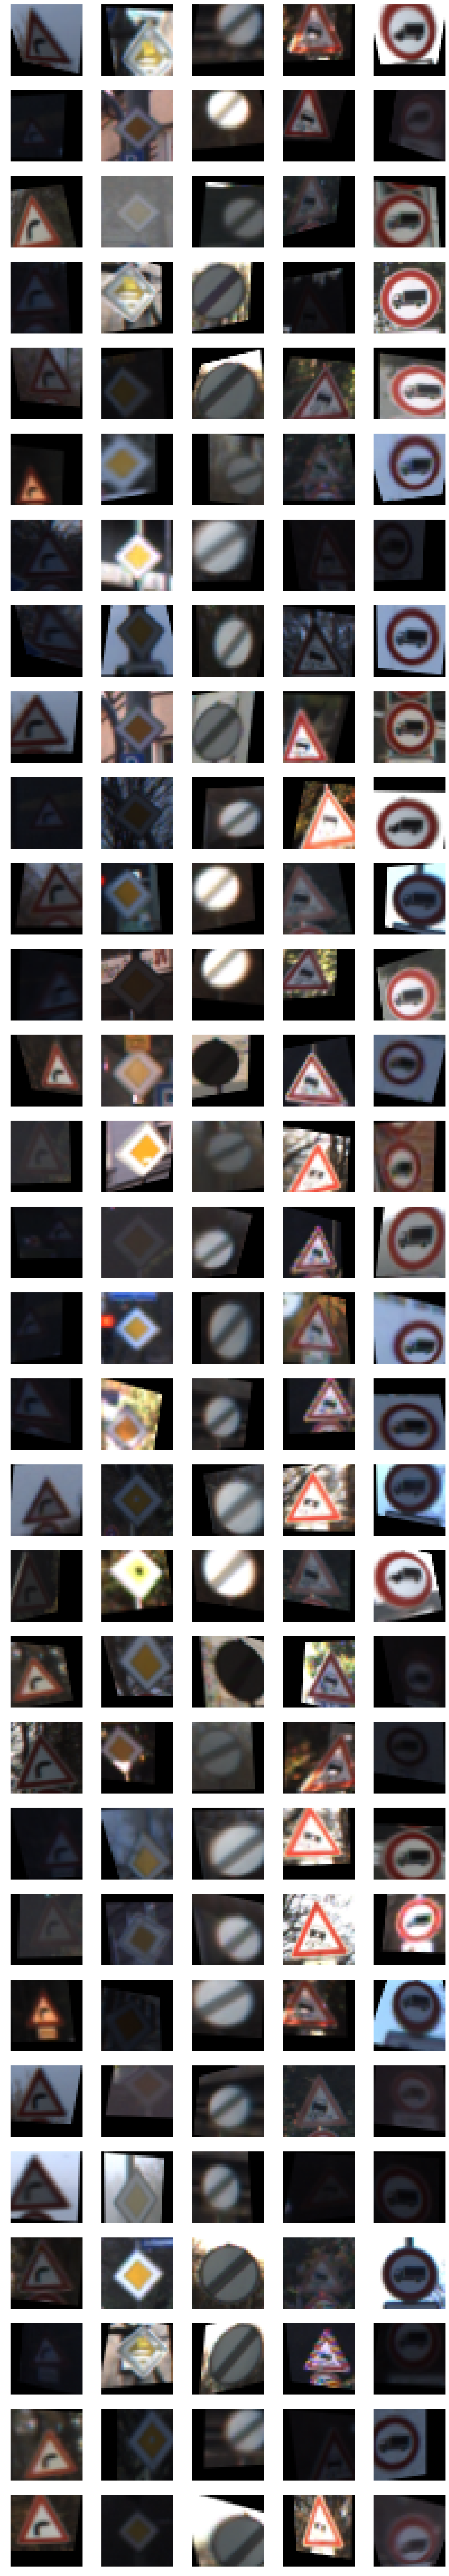

In [6]:
#%%

plot_data(data.train, classes=get_rand(range(0,42), 5), n_per_class=30, signs=data.signs)
